In [3]:
import pandas as pd
import matplotlib
matplotlib.rcParams.update({'font.size': 16})
matplotlib.rcParams.update({'grid.color': 'white', 'grid.linewidth':1})
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
pathforPK = "../data/nt01222a.z"
pathfordata = "../data/Kimberlite-2015-07-17.xls"
temp = np.loadtxt(pathforPK, skiprows=11, delimiter=",")
data = pd.read_excel(pathfordata)
data_active = data.loc[np.logical_and((data['Facies'] == 'XVK')|(data['Facies'] == 'PK')|(data['Facies'] == 'HK')|(data['Facies'] == 'VK'), data.notnull()['Rinf']==True)][["Facies", "0LabID (PCG)", "Peregrine ID", "(Latitude)", "(Longitude)", "Depth (m)","Mag Susc [SI]","Resistivity [Ohm.m]","Geometric Factor [m]","Sat Geometric Dens [g/cc]","Chargeability [ms]","Rinf","Linf","Ro","Rh","Qh","Ph", "Fh","pRh", "pQh","Rm","Qm","Pm", "Fm","pRm", "pQm","Rl","Ql","Pl", "Fl", "pRl", "pQl","Re","Qe","Pe-f","Pe-i"]]

In [6]:
# data_active[data['Facies'] == 'XVK']

In [7]:
labid = 'NT01222'

In [8]:
Linf = data_active[data['0LabID (PCG)'] == labid]['Linf'].values[0]

Rinf = data_active[data['0LabID (PCG)'] == labid]['Rinf'].values[0]
Rh = data_active[data['0LabID (PCG)'] == labid]['Rh'].values[0]
Qh = data_active[data['0LabID (PCG)'] == labid]['Qh'].values[0]
Ph = data_active[data['0LabID (PCG)'] == labid]['Ph'].values[0]
Fh = data_active[data['0LabID (PCG)'] == labid]['Fh'].values[0]

Rm = data_active[data['0LabID (PCG)'] == labid]['Rm'].values[0]
Qm = data_active[data['0LabID (PCG)'] == labid]['Qm'].values[0]
Pm = data_active[data['0LabID (PCG)'] == labid]['Pm'].values[0]
Fm = data_active[data['0LabID (PCG)'] == labid]['Fm'].values[0]

Rl = data_active[data['0LabID (PCG)'] == labid]['Rl'].values[0]
Ql = data_active[data['0LabID (PCG)'] == labid]['Ql'].values[0]
Pl = data_active[data['0LabID (PCG)'] == labid]['Pl'].values[0]
Fl = data_active[data['0LabID (PCG)'] == labid]['Fl'].values[0]

Re = data_active[data['0LabID (PCG)'] == labid]['Re'].values[0]
Qe = data_active[data['0LabID (PCG)'] == labid]['Qe'].values[0]

Pef = data_active[data['0LabID (PCG)'] == labid]['Pe-f'].values[0]
Pei = data_active[data['0LabID (PCG)'] == labid]['Pe-i'].values[0]

/Users/sgkang/anaconda/lib/python2.7/site-packages/pandas/core/frame.py:1825: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


In [9]:
import sys 
sys.path.append("../codes/")
from Zarcfit import *

In [10]:
# observed impedance
obs = temp[:,4]+1j*temp[:,5]
# frequency
frequency = temp[:,0].copy()
# Initiate Zarfit
zarc = Zarcfit(obs, frequency)
zarc.SetParametersSeries(Linf, Rinf, Rh, Fh, Ph, Rl, Fl, Pl, Rm, Fm, Pm, Re, Qe, Pef, Pei)
predS = zarc.Zseries(frequency)
predP = zarc.Zparallel(frequency)

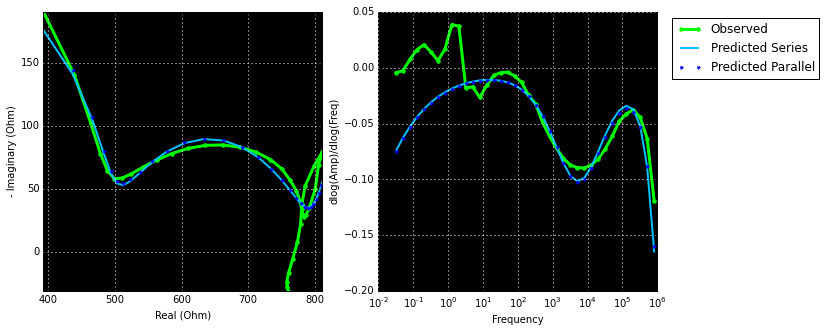

In [11]:
fig = plt.figure(figsize = (11, 5))
amp = np.sqrt(obs.real**2+obs.imag**2)
amp_predS = np.sqrt(predS.real**2+predS.imag**2)
amp_predP = np.sqrt(predP.real**2+predP.imag**2)

ax = plt.subplot(121)
ax1 = plt.subplot(122)
ax.patch.set_facecolor('black')
ax1.patch.set_facecolor('black')
ax.plot(obs.real, -obs.imag, 'lime', lw=3, marker=".", ms=8)
ax.plot(predS.real, -predS.imag, 'deepskyblue', lw=2)
ax.plot(predS.real, -predP.imag, 'b.')
ax1.semilogx(frequency[1:]*0.5+frequency[0:-1]*0.5, diff(np.log10(amp))/diff(np.log10(frequency)), 'lime', lw=3, marker=".", ms=8)
ax1.semilogx(frequency[1:]*0.5+frequency[0:-1]*0.5, diff(np.log10(amp_predS))/diff(np.log10(frequency)), 'deepskyblue', lw=2)
ax1.semilogx(frequency[1:]*0.5+frequency[0:-1]*0.5, diff(np.log10(amp_predP))/diff(np.log10(frequency)), 'b.', lw=2)
ax.set_xlim(obs.real.min(), obs.real.max())
ax.set_ylim((-obs.imag).min(), (-obs.imag).max())
ax.set_xlabel("Real (Ohm)")
ax.set_ylabel("- Imaginary (Ohm)")
ax1.set_xlabel("Frequency")
ax1.set_ylabel("dlog(Amp)/dlog(Freq)")
ax.grid(True)
ax.yaxis.grid(True, which='minor')
plt.tick_params(axis='y', which='minor')
ax1.grid(True)
ax1.yaxis.grid(True, which='minor')
plt.tick_params(axis='y', which='minor')
leg = ax1.legend(("Observed", "Predicted Series", "Predicted Parallel"), fontsize = 12, bbox_to_anchor = (1.6, 1))